The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting. It is a bipartite graph representing the document incidence structure.

* https://en.wikipedia.org/wiki/Levi_graph

In [2]:
import networkx as nx
import yaml

from src import nx_yaml


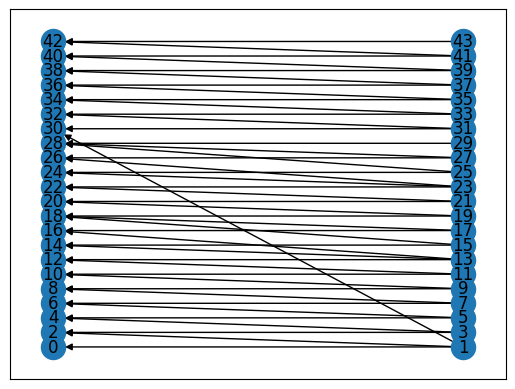

In [3]:
G0 = yaml.compose("""
# 2.2.2
? - !constant {}: ℙ
  - !partial { X, ℙ }: ℙ
  # 2.2.1.1
  - !evaluate { ℙ, A }: B
# 2.3.1
? - !evaluate ℙ: A
  - !embed A: ℙ
""", Loader=nx_yaml.NxSafeLoader)
G0 = G0.graph
nodes = {n for n, b in G0.nodes(data="bipartite") if b == 0}
pos = nx.bipartite_layout(G0, nodes=nodes)
nx.draw_networkx(G0, pos=pos)

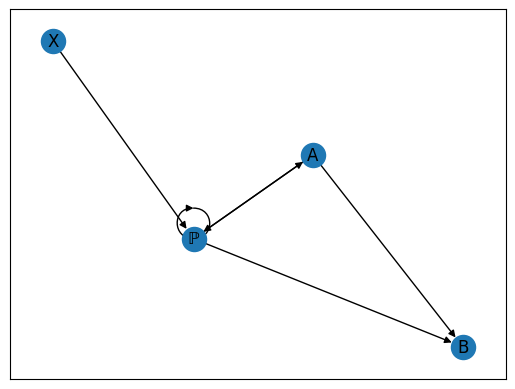

In [4]:
from itertools import combinations


def levi_to_digraph(G: nx.MultiDiGraph):
    G0 = G.copy()
    scalar_nodes = {d["value"] for n, d in G0.nodes(data=True) if d["bipartite"] == 0 and d["kind"] == "scalar"}
    G1 = nx.DiGraph()
    G1.add_nodes_from(scalar_nodes)
    edge_nodes = {n for n, d in G0.nodes(data=True) if d["bipartite"] == 1}
    for edge_node in edge_nodes:
        neighbors = [G0.nodes[n]["value"] for n in G0[edge_node] if G0.nodes[n].get("kind") == "scalar"]
        G1.add_edges_from(combinations(neighbors, 2))
    # nx.draw_networkx(G2)
    return G1

G1 = levi_to_digraph(G0)
nx.draw_networkx(G1)